# Load And Structure Data

In [47]:
# strat_univ = ['BTCUSDT','ETHUSDT','ADAUSDT','BNBUSDT','XRPUSDT','DOTUSDT','MATICUSDT']

strat_univ = [
    'BTCUSDT', 'ETHUSDT', 'XRPUSDT', 'BCHUSDT', 'LTCUSDT', 'EOSUSDT', 'BNBUSDT',
    'XLMUSDT', 'TRXUSDT', 'ADAUSDT', 'XTZUSDT', 'LINKUSDT', 'ATOMUSDT',
    'NEOUSDT', 'MKRUSDT', 'DASHUSDT', 'ETCUSDT', 'USDCUSDT', 'ONTUSDT', 'VETUSDT',
    'DOGEUSDT', 'BATUSDT', 'ZECUSDT',
    'SNXUSDT', 'QTUMUSDT', 'TUSDUSDT', 'ZRXUSDT',
    'THXUSDT', 'THRUSDT', 'ALGOUSDT', 'REPUSDT', 'NANOUSDT', 'KBCUSDT', 'BTGUSDT', 'RVNUSDT', 'OMGUSDT',
    'CNXUSDT', 'ABBCUSDT', 'XINUSDT', 'VSYSUSDT', 'SEELEUSDT', 'EONUSDT', 'ZBUSDT', 'EKTUSDT', 'DGBUSDT',
    'BTMUSDT', 'LSKUSDT', 'KMDUSDT', 'SAIUSDT', 'LUNAUSDT', 'KCSUSDT', 'FTTUSDT', 'QNTUSDT', 'SXPUSDT',
    'BDXUSDT', 'GAPUSDT', 'BCDUSDT', 'THETAUSDT', 'ICXUSDT', 'FSTUSDT', 'MATICUSDT', 'SCUSDT', 'EVRUSDT',
    'BTTUSDT', 'MOFUSDT', 'IOSTUSDT', 'MCOUSDT', 'WAVESUSDT', 'XVGUSDT', 'MONAUSDT', 'BTSUSDT', 'BCNUSDT',
    'HCUSDT', 'MAIDUSDT', 'NEXOUSDT', 'ARDRUSDT', 'DXUSDT', 'OKBUSDT', 'FXCUSDT', 'RLCUSDT', 'MBUSDT',
    'BXKUSDT', 'AEUSDT', 'ENJUSDT', 'STEEMUSDT', 'SLVUSDT', 'BRZEUSDT', 'ZILUSDT', 'VESTUSDT', 'ZENUSDT',
    'SOLVEUSDT', 'CHZUSDT', 'NOAHUSDT', 'LAUSDT', 'BTMXUSDT', 'ETNUSDT', 'ENGUSDT', 'ILCUSDT', 'NPXSUSDT',
    'CRPTUSDT', 'GNTUSDT', 'SNTUSDT', 'ELFUSDT', 'JWLUSDT', 'FETUSDT', 'BOTXUSDT', 'NRGUSDT', 'DGDUSDT',
    'EXMRUSDT', 'EURSUSDT', 'AOAUSDT', 'RIFUSDT', 'CIX100USDT', 'BFUSDT', 'XZCUSDT', 'FABUSDT', 'GRINUSDT',
    'NETUSDT', 'VERIUSDT', 'DGTXUSDT', 'KNCUSDT', 'RENUSDT', 'STRATUSDT', 'ETPUSDT', 'NEXUSDT', 'NEWUSDT',
    'BCZEROUSDT', 'GXCUSDT', 'TNTUSDT', 'BTC2USDT', 'PPTUSDT', 'USDKUSDT', 'ELAUSDT', 'IGNISUSDT', 'PLCUSDT',
    'BNKUSDT', 'DTRUSDT', 'RCNUSDT', 'HPTUSDT', 'LAMBUSDT', 'MANAUSDT', 'EDCUSDT', 'BEAMUSDT', 'TTUSDT',
    'AIONUSDT', 'BZUSDT', 'WTCUSDT', 'WICCUSDT', 'LRCUSDT', 'BRDUSDT', 'FCTUSDT', 'NULSUSDT', 'FTMUSDT',
    'IOTXUSDT', 'QBITUSDT', 'XMXUSDT', 'YOUUSDT', 'NASUSDT', 'WAXPUSDT', 'ARKUSDT', 'RDDUSDT', 'GNYUSDT',
    'AGVCUSDT', 'HYNUSDT', 'CVCUSDT', 'WANUSDT', 'WINUSDT', 'LINAUSDT', 'RUSDT', 'PAIUSDT', 'FSNUSDT',
    'FUNUSDT', 'DPTUSDT', 'BHDUSDT', 'LOOMUSDT', 'XACUSDT', 'BUSDUSDT', 'BHPUSDT', 'TRUEUSDT', 'LOKIUSDT',
    'QASHUSDT', 'BNTUSDT', 'DOTUSDT', 'SOLUSDT']

In [48]:
from binance.client import Client as bnb_client
from binance.client import BinanceAPIException
from datetime import datetime
import pandas as pd

client = bnb_client(tld='US')

def get_price_data_for_coin(coin, freq, start_datetime, end_datetime):
    bn_data = client.get_historical_klines(coin, freq, start_datetime, end_datetime)
    columns = ['open_time','open','high','low','close','volume','close_time','quote_volume',
        'num_trades','taker_base_volume','taker_quote_volume','ignore']

    bn_data = pd.DataFrame(bn_data, columns=columns)
    bn_data['open_time'] = bn_data['open_time'].map(lambda x: datetime.utcfromtimestamp(x / 1000))
    bn_data['close_time'] = bn_data['close_time'].map(lambda x: datetime.utcfromtimestamp(x / 1000))
    return bn_data


def get_price_data_for_universe(freq, start_datetime, end_datetime):
    px_data = {}

    for coin in strat_univ:
        try:
            px_data[coin] = get_price_data_for_coin(
                coin, freq, start_datetime, end_datetime).set_index('open_time')
            print(f"Downloaded data for {coin}.")
        except BinanceAPIException:
            print(f"Couldn't load data for {coin}.")
    
    return px_data

In [49]:
data_freq = '4h'
look_back_window_size = 30 * 6
look_back_min_periods = 10 * 6
start_datetime = '2020-01-01 00:00:00'
end_datetime = '2025-02-20 08:00:00'
min_data_points_to_transact = 10 * 6
out_sample_start_datetime = pd.to_datetime("2023-01-01 00:00:00")

In [50]:
px_data = get_price_data_for_universe(data_freq, start_datetime, end_datetime)

Downloaded data for BTCUSDT.
Downloaded data for ETHUSDT.
Downloaded data for XRPUSDT.
Downloaded data for BCHUSDT.
Downloaded data for LTCUSDT.
Downloaded data for EOSUSDT.
Downloaded data for BNBUSDT.
Downloaded data for XLMUSDT.
Downloaded data for TRXUSDT.
Downloaded data for ADAUSDT.
Downloaded data for XTZUSDT.
Downloaded data for LINKUSDT.
Downloaded data for ATOMUSDT.
Downloaded data for NEOUSDT.
Downloaded data for MKRUSDT.
Downloaded data for DASHUSDT.
Downloaded data for ETCUSDT.
Downloaded data for USDCUSDT.
Downloaded data for ONTUSDT.
Downloaded data for VETUSDT.
Downloaded data for DOGEUSDT.
Downloaded data for BATUSDT.
Downloaded data for ZECUSDT.
Downloaded data for SNXUSDT.
Downloaded data for QTUMUSDT.
Downloaded data for TUSDUSDT.
Downloaded data for ZRXUSDT.
Couldn't load data for THXUSDT.
Couldn't load data for THRUSDT.
Downloaded data for ALGOUSDT.
Couldn't load data for REPUSDT.
Couldn't load data for NANOUSDT.
Couldn't load data for KBCUSDT.
Couldn't load data 

In [59]:
px_close = {coin: px_data[coin]["close"] for coin in px_data}
px_close = pd.DataFrame(px_close).astype(float)
px_close.index.rename("datetime", inplace=True)

px_close

,BTCUSDT,ETHUSDT,XRPUSDT,BCHUSDT,LTCUSDT,EOSUSDT,BNBUSDT,XLMUSDT,TRXUSDT,ADAUSDT,...,MANAUSDT,LRCUSDT,FTMUSDT,IOTXUSDT,WAXPUSDT,LOOMUSDT,BUSDUSDT,BNTUSDT,DOTUSDT,SOLUSDT
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,7230.71,130.18,0.19406,205.64,41.58,NaN,13.8159,0.04515,NaN,0.03308,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,7205.50,130.52,0.19518,206.72,41.55,NaN,13.7648,0.04493,NaN,0.03320,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,7195.80,130.84,0.19358,205.61,41.67,NaN,13.7162,0.04509,NaN,0.03321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 12:00:00,7233.02,131.84,0.19428,206.63,41.89,NaN,13.7958,0.04542,NaN,0.03357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 16:00:00,7223.72,131.98,0.19474,206.35,41.79,NaN,13.7270,0.04547,NaN,0.03361,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-19 16:00:00,96235.29,2709.46,2.66600,321.30,135.19,0.5836,651.2500,0.33390,NaN,0.75890,...,0.3119,0.1309,0.6902,0.02921,0.03003,0.04663,NaN,0.577,4.878,168.79
2025-02-19 20:00:00,96650.01,2715.33,2.74310,322.90,135.10,0.5836,654.3400,0.34200,NaN,0.77420,...,0.3118,0.1304,0.7158,0.02936,0.03005,0.04663,NaN,0.577,4.851,169.00
2025-02-20 00:00:00,97040.40,2743.25,2.71250,325.30,133.33,0.6427,654.7100,0.34070,NaN,0.78140,...,0.3225,0.1320,0.7221,0.02936,0.03005,0.04663,NaN,0.577,4.905,172.56


# Define Functions For Picking Coins And Setting Holdings

In [60]:
import numpy as np
import statsmodels.api as sm
from enum import Enum

class CorrSelectionMethod(Enum):
    MAX_CORR = 1
    MIN_CORR = 2


def get_newly_uncorrelated_keys(current_correlated_triples, price_indicator_window_df,
                                corr_matrix, rejection_max_corr):
    newly_uncorrelated_keys = set()
    for key_coin in current_correlated_triples:
        value_coin_1 = current_correlated_triples[key_coin].columns[0]
        value_coin_2 = current_correlated_triples[key_coin].columns[1]
        triple_list = [key_coin, value_coin_1, value_coin_2]
        
        # if any of the coins do not have data (e.g. if the coin no longer exists)
        if price_indicator_window_df[triple_list].iloc[-1].isnull().any():
            newly_uncorrelated_keys.add(key_coin)
        elif ((corr_matrix.loc[key_coin, value_coin_1] < rejection_max_corr or \
               corr_matrix.loc[key_coin, value_coin_2] < rejection_max_corr)):
            newly_uncorrelated_keys.add(key_coin)
    return newly_uncorrelated_keys


def remove_uncorrelated_keys(newly_uncorrelated_keys, coins_in_a_triple, current_correlated_triples):
    for coin in newly_uncorrelated_keys:
        coins_in_a_triple.remove(coin)
        coins_in_a_triple.remove(current_correlated_triples[coin].columns[0])
        coins_in_a_triple.remove(current_correlated_triples[coin].columns[1])
        
        if coin in current_correlated_triples: # only the dependent coin will appears as a key
            del current_correlated_triples[coin]


def update_correlated_coins(coin, corr_matrix, coins_in_a_triple, current_correlated_triples,
                            price_indicator_window_df, secondary_coin_min_corr, tertiary_coin_max_corr):
    largest_corr = -1.0
    secondary_coin = None
    for other_coin, other_coin_value in corr_matrix[coin][corr_matrix[coin] > secondary_coin_min_corr].items():
        if np.isnan(price_indicator_window_df[other_coin]).any():
            continue
        elif other_coin in coins_in_a_triple:
            continue
        elif other_coin != coin and corr_matrix.loc[coin, other_coin] >= largest_corr:
            largest_corr = corr_matrix.loc[coin, other_coin]
            secondary_coin = other_coin
    
    if secondary_coin is None:
        return
    
    tertiary_coin = None
    correlation_to_secondary_coin = 1.0
    for other_coin, other_coin_value in corr_matrix[coin][corr_matrix[coin] > secondary_coin_min_corr].items():
        if np.isnan(price_indicator_window_df[other_coin]).any():
            continue
        elif other_coin in coins_in_a_triple:
            continue
        elif (
            other_coin != coin and \
            other_coin != largest_corr_coin and \
            corr_matrix.loc[largest_corr_coin, tertiary_coin] < tertiary_coin_max_corr and \
            corr_matrix.loc[largest_corr_coin, tertiary_coin] < correlation_to_secondary_coin):
            correlation_to_secondary_coin = corr_matrix.loc[largest_corr_coin, tertiary_coin]
            tertiary_coin = other_coin
            
    if tertiary_coin is None:
        return
    
    coins_in_a_triple.add(coin)
    coins_in_a_triple.add(secondary_coin)
    coins_in_a_triple.add(tertiary_coin)
    current_correlated_triples[coin] = pd.DataFrame(
        0.0, columns=[secondary_coin, tertiary_coin, 'alpha', 'residual'], index=[])


def update_correlated_triples(current_correlated_triples, coins_in_a_triple, corr_matrix, 
                              price_indicator_window_df, secondary_coin_min_corr, tertiary_coin_max_corr):
    for coin in list(price_indicator_window_df.columns):
        if (coin not in coins_in_a_triple):
            update_correlated_coins(
                coin,
                corr_matrix,
                coins_in_a_triple,
                current_correlated_triples,
                price_indicator_window_df,
                secondary_coin_min_corr,
                tertiary_coin_max_corr
            )


def set_time_holdings(holdings_df, time_index, price_indicator_window_df, current_correlated_triples,
                      min_data_points_to_transact, look_back_window_size, z_score_min_threshold,
                      z_score_max_threshold):
    for coin in current_correlated_triples:
        independent_coin_1 = current_correlated_triples[coin].columns[0]
        independent_coin_2 = current_correlated_triples[coin].columns[1]
        
        model = sm.OLS(
            price_indicator_window_df[coin].iloc[:-1],
            sm.add_constant(price_indicator_window_df[[independent_coin_1, independent_coin_2]].iloc[:-1])
        )
        
        result = model.fit()
        result_data = {
            independent_coin_1: result.params[independent_coin_1],
            independent_coin_2: result.params[independent_coin_2],
            'alpha': result.params['const']
        }
        
        estimate = model.predict(
            result.params,
            sm.add_constant(
                price_indicator_window_df[[independent_coin_1, independent_coin_2]]).iloc[-1]
        )
        result_data['residual'] = price_indicator_window_df[coin].iloc[-1] - estimate
        result_series = pd.Series(result_data)
        current_correlated_triples[coin].loc[time_index] = result_series
        
        if len(current_correlated_triples[coin]) >= min_data_points_to_transact:
            z_score_look_back_len = min(look_back_window_size, len(current_correlated_triples[coin]))
            look_back_coin_regression_data = current_correlated_triples[coin].iloc[(-z_score_look_back_len):]
            residual_mean = look_back_coin_regression_data['residual'].mean()
            residual_std = look_back_coin_regression_data['residual'].std()
            z_score = (result_data['residual'] - residual_mean) / residual_std
            
            if z_score_min_threshold <= z_score <= z_score_max_threshold:
                holdings_df.loc[time_index, coin] = -1.0
                holdings_df.loc[time_index, independent_coin_1] = result_data[independent_coin_1]
                holdings_df.loc[time_index, independent_coin_2] = result_data[independent_coin_2]
            elif -z_score_max_threshold <= z_score <= -z_score_min_threshold:
                holdings_df.loc[time_index, coin] = 1.0
                holdings_df.loc[time_index, independent_coin_1] = -result_data[independent_coin_1]
                holdings_df.loc[time_index, independent_coin_2] = -result_data[independent_coin_2]

    holdings_df.loc[time_index] = holdings_df.loc[time_index] / holdings_df.loc[time_index].abs().sum()


def get_holdings_df(
    price_indicator_df,
    look_back_min_periods,
    look_back_window_size,
    secondary_coin_min_corr,
    tertiary_coin_max_corr,
    rejection_max_corr,
    min_data_points_to_transact,
    z_score_min_threshold,
    z_score_max_threshold,
    corr_selection_method):
    
    holdings_df = pd.DataFrame(0.0, columns=price_indicator_df.columns, index=price_indicator_df.index)
    
    current_correlated_triples = dict()
    coins_in_a_triple = set()
    
    for index in range(look_back_min_periods, len(holdings_df)):
        window_start = max(index-look_back_window_size, 0)
        
        # exclude the data from the current index itself to avoid having to shift forward strategy holdings
        # later when calculating returns to avoid look-ahead bias
        price_indicator_window_df = price_indicator_df.iloc[window_start:index]
        
        time_index = price_indicator_df.index[index]
        holdings_df.loc[time_index] = pd.Series(0.0, index=holdings_df.columns)
        
        corr_matrix = price_indicator_window_df.corr()
        
        newly_uncorrelated_keys = get_newly_uncorrelated_keys(
            current_correlated_triples,
            price_indicator_window_df,
            corr_matrix,
            rejection_max_corr)
        
        # update coins_in_a_triple and current_correlated_triples in-place
        remove_uncorrelated_keys(newly_uncorrelated_keys, coins_in_a_triple, current_correlated_triples)

        update_correlated_triples(
            current_correlated_triples,
            coins_in_a_triple,
            corr_matrix,
            price_indicator_window_df,
            secondary_coin_min_corr,
            tertiary_coin_max_corr)
        
        set_time_holdings(
            holdings_df,
            time_index,
            price_indicator_window_df,
            current_correlated_triples,
            min_data_points_to_transact, look_back_window_size, z_score_min_threshold, z_score_max_threshold)

    return holdings_df

# Define Functions For Evaluation

In [61]:
def get_net_return(strat_holdings, ret):
    # assume that strat_holdings have already been shifted back in time to avoid look-ahead bias or that
    # data does not depend on current time point
    gross_ret = (strat_holdings * ret).sum(axis=1)
    
    turnover = (strat_holdings.fillna(0) - strat_holdings.shift().fillna(0)).abs().sum(axis=1)
    tcost_bps = 20
    return gross_ret.subtract(turnover * tcost_bps * 1e-4, fill_value=0)

Calculate the sharpe ratio of the net returns for both the in-sample period and the out-sample period.

In [62]:
def get_sharpe_ratio_data(net_returns_ser):
    sr_data = dict()
    sr_data["total sr"] = net_returns_ser.mean() / net_returns_ser.std() * np.sqrt(365 * 6)
    
    out_sample_start = pd.to_datetime(out_sample_start_datetime)
    in_sample_end = out_sample_start - pd.Timedelta(hours=4)
    
    sr_data["in-sample sr"] = net_returns_ser.loc[:in_sample_end].mean() / net_returns_ser.loc[:in_sample_end].std() * np.sqrt(365 * 6)
    sr_data["out-sample sr"] = net_returns_ser.loc[out_sample_start:].mean() / net_returns_ser.loc[out_sample_start:].std() * np.sqrt(365 * 6)
    sr_series = pd.Series(sr_data)
    return sr_series

# Evaluate Different Sets Of Parameters

In [63]:
px_close

,BTCUSDT,ETHUSDT,XRPUSDT,BCHUSDT,LTCUSDT,EOSUSDT,BNBUSDT,XLMUSDT,TRXUSDT,ADAUSDT,...,MANAUSDT,LRCUSDT,FTMUSDT,IOTXUSDT,WAXPUSDT,LOOMUSDT,BUSDUSDT,BNTUSDT,DOTUSDT,SOLUSDT
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,7230.71,130.18,0.19406,205.64,41.58,NaN,13.8159,0.04515,NaN,0.03308,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,7205.50,130.52,0.19518,206.72,41.55,NaN,13.7648,0.04493,NaN,0.03320,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,7195.80,130.84,0.19358,205.61,41.67,NaN,13.7162,0.04509,NaN,0.03321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 12:00:00,7233.02,131.84,0.19428,206.63,41.89,NaN,13.7958,0.04542,NaN,0.03357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 16:00:00,7223.72,131.98,0.19474,206.35,41.79,NaN,13.7270,0.04547,NaN,0.03361,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-19 16:00:00,96235.29,2709.46,2.66600,321.30,135.19,0.5836,651.2500,0.33390,NaN,0.75890,...,0.3119,0.1309,0.6902,0.02921,0.03003,0.04663,NaN,0.577,4.878,168.79
2025-02-19 20:00:00,96650.01,2715.33,2.74310,322.90,135.10,0.5836,654.3400,0.34200,NaN,0.77420,...,0.3118,0.1304,0.7158,0.02936,0.03005,0.04663,NaN,0.577,4.851,169.00
2025-02-20 00:00:00,97040.40,2743.25,2.71250,325.30,133.33,0.6427,654.7100,0.34070,NaN,0.78140,...,0.3225,0.1320,0.7221,0.02936,0.03005,0.04663,NaN,0.577,4.905,172.56


In [64]:
price_close_returns = px_close / px_close.shift() - 1
price_close_returns

,BTCUSDT,ETHUSDT,XRPUSDT,BCHUSDT,LTCUSDT,EOSUSDT,BNBUSDT,XLMUSDT,TRXUSDT,ADAUSDT,...,MANAUSDT,LRCUSDT,FTMUSDT,IOTXUSDT,WAXPUSDT,LOOMUSDT,BUSDUSDT,BNTUSDT,DOTUSDT,SOLUSDT
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,-0.003487,0.002612,0.005771,0.005252,-0.000722,NaN,-0.003699,-0.004873,NaN,0.003628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,-0.001346,0.002452,-0.008198,-0.005370,0.002888,NaN,-0.003531,0.003561,NaN,0.000301,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 12:00:00,0.005172,0.007643,0.003616,0.004961,0.005280,NaN,0.005803,0.007319,NaN,0.010840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 16:00:00,-0.001286,0.001062,0.002368,-0.001355,-0.002387,NaN,-0.004987,0.001101,NaN,0.001192,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-19 16:00:00,0.002453,0.004907,0.023220,0.007526,-0.006686,-0.000171,0.000031,0.004815,NaN,0.000791,...,-0.000321,0.000000,-0.000869,0.014941,0.000000,0.000000,NaN,0.0,0.011823,-0.004130
2025-02-19 20:00:00,0.004309,0.002166,0.028920,0.004980,-0.000666,0.000000,0.004745,0.024259,NaN,0.020161,...,-0.000321,-0.003820,0.037091,0.005135,0.000666,0.000000,NaN,0.0,-0.005535,0.001244
2025-02-20 00:00:00,0.004039,0.010282,-0.011155,0.007433,-0.013101,0.101268,0.000565,-0.003801,NaN,0.009300,...,0.034317,0.012270,0.008801,0.000000,0.000000,0.000000,NaN,0.0,0.011132,0.021065


In [ ]:
correlation_acceptance_threshold = 0.85
correlation_rejection_threshold = 0.70

z_score_min_threshold = 3.0
z_score_max_threshold = 10.0
corr_selection_method = CorrSelectionMethod.MIN_CORR


holdings_df_from_price = get_holdings_df(
    price_close_returns,
    look_back_min_periods,
    look_back_window_size,
    correlation_acceptance_threshold,
    correlation_rejection_threshold,
    min_data_points_to_transact,
    z_score_min_threshold,
    z_score_max_threshold,
    corr_selection_method)

In [66]:
holdings_df_from_price

,BTCUSDT,ETHUSDT,XRPUSDT,BCHUSDT,LTCUSDT,EOSUSDT,BNBUSDT,XLMUSDT,TRXUSDT,ADAUSDT,...,MANAUSDT,LRCUSDT,FTMUSDT,IOTXUSDT,WAXPUSDT,LOOMUSDT,BUSDUSDT,BNTUSDT,DOTUSDT,SOLUSDT
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-01 08:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-01 12:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-01 16:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-19 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-02-19 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-02-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
net_returns_ser = get_net_return(holdings_df_from_price, px_close / px_close.shift() - 1)
sharpe_ratio_ser = get_sharpe_ratio_data(net_returns_ser)

In [68]:
net_returns_ser

datetime
2020-01-01 00:00:00    0.0
2020-01-01 04:00:00    0.0
2020-01-01 08:00:00    0.0
2020-01-01 12:00:00    0.0
2020-01-01 16:00:00    0.0
                      ... 
2025-02-19 16:00:00    0.0
2025-02-19 20:00:00    0.0
2025-02-20 00:00:00    0.0
2025-02-20 04:00:00    0.0
2025-02-20 08:00:00    0.0
Length: 11259, dtype: float64

<Axes: xlabel='datetime'>

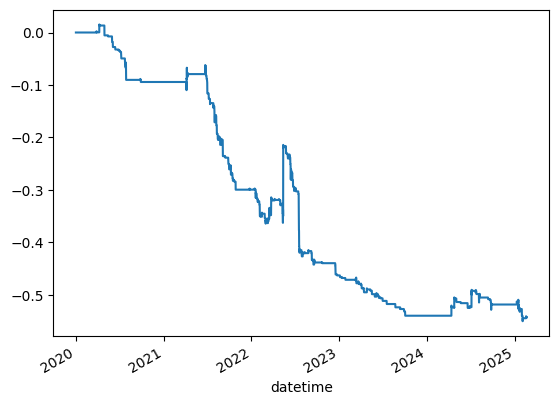

In [69]:
net_returns_ser.cumsum().plot()

In [70]:
sharpe_ratio_ser

total sr        -1.308932
in-sample sr    -1.550367
out-sample sr   -0.894155
dtype: float64

# Using 8 Coins

In [ ]:
correlation_acceptance_threshold = 0.85
correlation_rejection_threshold = 0.70

z_score_min_threshold = 3.0
z_score_max_threshold = 10.0
corr_selection_method = CorrSelectionMethod.MIN_CORR


holdings_df_from_price = get_holdings_df(
    price_close_returns,
    look_back_min_periods,
    look_back_window_size,
    correlation_acceptance_threshold,
    correlation_rejection_threshold,
    min_data_points_to_transact,
    z_score_min_threshold,
    z_score_max_threshold,
    corr_selection_method)

In [52]:
holdings_df_from_price.abs().sum()

BTCUSDT      28.988585
ETHUSDT      39.706842
ADAUSDT       8.316928
BNBUSDT      10.958789
XRPUSDT       3.074653
DOTUSDT       5.136488
MATICUSDT     5.817716
dtype: float64

In [53]:
net_returns_ser = get_net_return(holdings_df_from_price, px_close / px_close.shift() - 1)
sharpe_ratio_ser = get_sharpe_ratio_data(net_returns_ser)

In [54]:
net_returns_ser

datetime
2020-01-01 00:00:00    0.0
2020-01-01 04:00:00    0.0
2020-01-01 08:00:00    0.0
2020-01-01 12:00:00    0.0
2020-01-01 16:00:00    0.0
                      ... 
2025-02-19 16:00:00    0.0
2025-02-19 20:00:00    0.0
2025-02-20 00:00:00    0.0
2025-02-20 04:00:00    0.0
2025-02-20 08:00:00    0.0
Length: 11259, dtype: float64

<Axes: xlabel='datetime'>

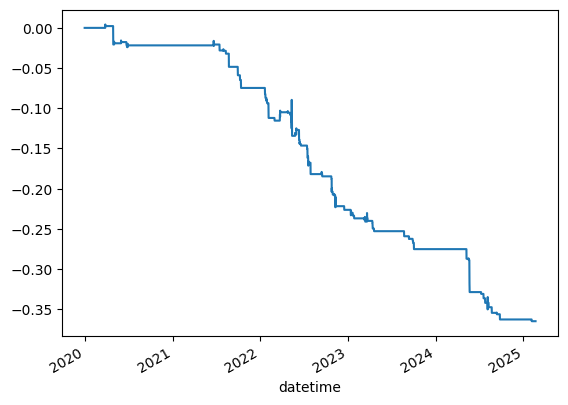

In [55]:
net_returns_ser.cumsum().plot()

In [56]:
sharpe_ratio_ser

total sr        -2.174069
in-sample sr    -2.049771
out-sample sr   -2.517051
dtype: float64

In [57]:
gross_returns = (holdings_df_from_price * (px_close / px_close.shift() - 1)).sum(axis=1)

<Axes: xlabel='datetime'>

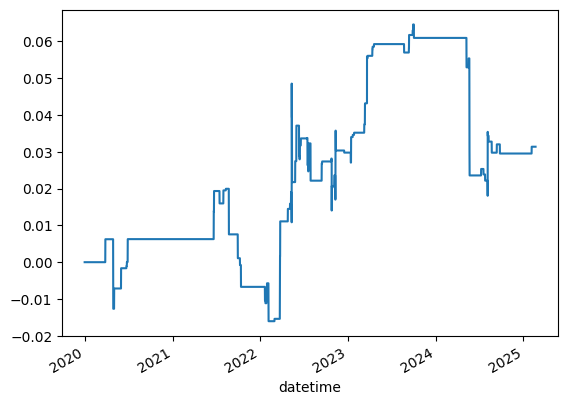

In [58]:
gross_returns.cumsum().plot()